# 학습 조기종료 시키기

1. 과적합되는 모델 살펴보기
2. 조기종료 시키기

    앞서 ‘학습과정과 데이터셋 이야기’에서 과적합이라는 것을 살펴보았고, 이를 방지하기 위해 조기 종료하는 시점에 대해서 알아보았습니다.<BR>
    본 절에서는 케라스에서 제공하는 기능을 이용하여 학습 중에 어떻게 조기 종료를 시킬 수 있는 지 알아보겠습니다.


## 1. 과적합되는 모델 살펴보기

    먼저 과적합되는 모델을 만들고 어떻게 학습이 되었는 지 살펴보겠습니다
    아래 코드에서 사용된 데이터수, 배치사이즈, 뉴런 수 등은 
    과적합 현상을 재현하기 하기 위해 설정된 것으로 실제 최적화된 수치는 아닙니다.

In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

Using TensorFlow backend.


In [2]:
# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [3]:
# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=3000, batch_size=10, validation_data=(X_val, Y_val))

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/3000
700/700 [==============================] - 0s - loss: 2.2071 - acc: 0.1671 - val_loss: 2.1907 - val_acc: 0.1800
Epoch 3/3000
700/700 [==============================] - 0s - loss: 2.1727 - acc: 0.1743 - val_loss: 2.1627 - val_acc: 0.1867
Epoch 4/3000
700/700 [==============================] - 0s - loss: 2.1438 - acc: 0.1786 - val_loss: 2.1369 - val_acc: 0.1867
Epoch 5/3000
700/700 [==============================] - 0s - loss: 2.1173 - acc: 0.1914 - val_loss: 2.1138 - val_acc: 0.1867
Epoch 6/3000
700/700 [==============================] - 0s - loss: 2.0936 - acc: 0.2014 - val_loss: 2.0929 - val_acc: 0.2033
Epoch 7/3000
700/700 [==============================] - 0s - loss: 2.0716 - acc: 0.2086 - val_loss: 2.0724 - val_acc: 0.2067
Epoch 8/3000
700/700 [==============================] - 0s - loss: 2.0517 - acc

700/700 [==============================] - 0s - loss: 1.7452 - acc: 0.2829 - val_loss: 1.8319 - val_acc: 0.2000
Epoch 66/3000
700/700 [==============================] - 0s - loss: 1.7435 - acc: 0.2786 - val_loss: 1.8309 - val_acc: 0.2067
Epoch 67/3000
700/700 [==============================] - 0s - loss: 1.7415 - acc: 0.2686 - val_loss: 1.8304 - val_acc: 0.2033
Epoch 68/3000
700/700 [==============================] - 0s - loss: 1.7400 - acc: 0.2757 - val_loss: 1.8253 - val_acc: 0.2000
Epoch 69/3000
700/700 [==============================] - 0s - loss: 1.7371 - acc: 0.2843 - val_loss: 1.8301 - val_acc: 0.2167
Epoch 70/3000
700/700 [==============================] - 0s - loss: 1.7351 - acc: 0.2843 - val_loss: 1.8290 - val_acc: 0.2433
Epoch 71/3000
700/700 [==============================] - 0s - loss: 1.7340 - acc: 0.2800 - val_loss: 1.8225 - val_acc: 0.2167
Epoch 72/3000
700/700 [==============================] - 0s - loss: 1.7322 - acc: 0.2871 - val_loss: 1.8237 - val_acc: 0.2133
Epoch 

700/700 [==============================] - 0s - loss: 1.6550 - acc: 0.3143 - val_loss: 1.8278 - val_acc: 0.2233
Epoch 130/3000
700/700 [==============================] - 0s - loss: 1.6529 - acc: 0.3271 - val_loss: 1.8187 - val_acc: 0.2567
Epoch 131/3000
700/700 [==============================] - 0s - loss: 1.6525 - acc: 0.3243 - val_loss: 1.8293 - val_acc: 0.2533
Epoch 132/3000
700/700 [==============================] - 0s - loss: 1.6525 - acc: 0.3300 - val_loss: 1.8174 - val_acc: 0.2267
Epoch 133/3000
700/700 [==============================] - 0s - loss: 1.6506 - acc: 0.3271 - val_loss: 1.8363 - val_acc: 0.2500
Epoch 134/3000
700/700 [==============================] - 0s - loss: 1.6490 - acc: 0.3200 - val_loss: 1.8285 - val_acc: 0.2767
Epoch 135/3000
700/700 [==============================] - 0s - loss: 1.6489 - acc: 0.3286 - val_loss: 1.8266 - val_acc: 0.2333
Epoch 136/3000
700/700 [==============================] - 0s - loss: 1.6473 - acc: 0.3214 - val_loss: 1.8227 - val_acc: 0.2367

700/700 [==============================] - 0s - loss: 1.6026 - acc: 0.3386 - val_loss: 1.8604 - val_acc: 0.2233
Epoch 194/3000
700/700 [==============================] - 0s - loss: 1.6022 - acc: 0.3429 - val_loss: 1.8530 - val_acc: 0.2267
Epoch 195/3000
700/700 [==============================] - 0s - loss: 1.6015 - acc: 0.3457 - val_loss: 1.8517 - val_acc: 0.2467
Epoch 196/3000
700/700 [==============================] - 0s - loss: 1.6012 - acc: 0.3486 - val_loss: 1.8536 - val_acc: 0.2200
Epoch 197/3000
700/700 [==============================] - 0s - loss: 1.5998 - acc: 0.3486 - val_loss: 1.8541 - val_acc: 0.2300
Epoch 198/3000
700/700 [==============================] - 0s - loss: 1.6002 - acc: 0.3414 - val_loss: 1.8643 - val_acc: 0.2200
Epoch 199/3000
700/700 [==============================] - 0s - loss: 1.6000 - acc: 0.3371 - val_loss: 1.8609 - val_acc: 0.2233
Epoch 200/3000
700/700 [==============================] - 0s - loss: 1.5970 - acc: 0.3457 - val_loss: 1.8659 - val_acc: 0.2633

700/700 [==============================] - 0s - loss: 1.5669 - acc: 0.3457 - val_loss: 1.8984 - val_acc: 0.2433
Epoch 258/3000
700/700 [==============================] - 0s - loss: 1.5649 - acc: 0.3600 - val_loss: 1.9046 - val_acc: 0.2600
Epoch 259/3000
700/700 [==============================] - 0s - loss: 1.5650 - acc: 0.3643 - val_loss: 1.9016 - val_acc: 0.2167
Epoch 260/3000
700/700 [==============================] - 0s - loss: 1.5661 - acc: 0.3600 - val_loss: 1.9056 - val_acc: 0.2233
Epoch 261/3000
700/700 [==============================] - 0s - loss: 1.5638 - acc: 0.3557 - val_loss: 1.8815 - val_acc: 0.2167
Epoch 262/3000
700/700 [==============================] - 0s - loss: 1.5640 - acc: 0.3614 - val_loss: 1.8925 - val_acc: 0.2133
Epoch 263/3000
700/700 [==============================] - 0s - loss: 1.5634 - acc: 0.3629 - val_loss: 1.8968 - val_acc: 0.2133
Epoch 264/3000
700/700 [==============================] - 0s - loss: 1.5642 - acc: 0.3529 - val_loss: 1.8903 - val_acc: 0.2167

700/700 [==============================] - 0s - loss: 1.5398 - acc: 0.3671 - val_loss: 1.9373 - val_acc: 0.2333
Epoch 322/3000
700/700 [==============================] - 0s - loss: 1.5378 - acc: 0.3657 - val_loss: 1.9256 - val_acc: 0.2567
Epoch 323/3000
700/700 [==============================] - 0s - loss: 1.5389 - acc: 0.3714 - val_loss: 1.9277 - val_acc: 0.2300
Epoch 324/3000
700/700 [==============================] - 0s - loss: 1.5377 - acc: 0.3714 - val_loss: 1.9347 - val_acc: 0.2200
Epoch 325/3000
700/700 [==============================] - 0s - loss: 1.5393 - acc: 0.3571 - val_loss: 1.9244 - val_acc: 0.2133
Epoch 326/3000
700/700 [==============================] - 0s - loss: 1.5371 - acc: 0.3600 - val_loss: 1.9376 - val_acc: 0.2233
Epoch 327/3000
700/700 [==============================] - 0s - loss: 1.5363 - acc: 0.3714 - val_loss: 1.9503 - val_acc: 0.2267
Epoch 328/3000
700/700 [==============================] - 0s - loss: 1.5374 - acc: 0.3643 - val_loss: 1.9407 - val_acc: 0.2200

700/700 [==============================] - 0s - loss: 1.5156 - acc: 0.3729 - val_loss: 1.9662 - val_acc: 0.2200
Epoch 386/3000
700/700 [==============================] - 0s - loss: 1.5149 - acc: 0.3714 - val_loss: 1.9587 - val_acc: 0.2367
Epoch 387/3000
700/700 [==============================] - 0s - loss: 1.5145 - acc: 0.3700 - val_loss: 1.9676 - val_acc: 0.2300
Epoch 388/3000
700/700 [==============================] - 0s - loss: 1.5132 - acc: 0.3700 - val_loss: 1.9769 - val_acc: 0.2567
Epoch 389/3000
700/700 [==============================] - 0s - loss: 1.5151 - acc: 0.3800 - val_loss: 1.9598 - val_acc: 0.2267
Epoch 390/3000
700/700 [==============================] - 0s - loss: 1.5115 - acc: 0.3686 - val_loss: 1.9605 - val_acc: 0.2367
Epoch 391/3000
700/700 [==============================] - 0s - loss: 1.5121 - acc: 0.3843 - val_loss: 1.9644 - val_acc: 0.2367
Epoch 392/3000
700/700 [==============================] - 0s - loss: 1.5127 - acc: 0.3743 - val_loss: 1.9667 - val_acc: 0.2233

700/700 [==============================] - 0s - loss: 1.4946 - acc: 0.3943 - val_loss: 2.0097 - val_acc: 0.2300
Epoch 450/3000
700/700 [==============================] - 0s - loss: 1.4956 - acc: 0.3871 - val_loss: 1.9982 - val_acc: 0.2200
Epoch 451/3000
700/700 [==============================] - 0s - loss: 1.4948 - acc: 0.3843 - val_loss: 2.0008 - val_acc: 0.2267
Epoch 452/3000
700/700 [==============================] - 0s - loss: 1.4938 - acc: 0.3843 - val_loss: 1.9970 - val_acc: 0.2233
Epoch 453/3000
700/700 [==============================] - 0s - loss: 1.4937 - acc: 0.3857 - val_loss: 2.0007 - val_acc: 0.2333
Epoch 454/3000
700/700 [==============================] - 0s - loss: 1.4935 - acc: 0.3857 - val_loss: 2.0047 - val_acc: 0.2267
Epoch 455/3000
700/700 [==============================] - 0s - loss: 1.4933 - acc: 0.3786 - val_loss: 1.9945 - val_acc: 0.2267
Epoch 456/3000
700/700 [==============================] - 0s - loss: 1.4926 - acc: 0.3843 - val_loss: 1.9983 - val_acc: 0.2400

700/700 [==============================] - 0s - loss: 1.4767 - acc: 0.3943 - val_loss: 2.0216 - val_acc: 0.2400
Epoch 514/3000
700/700 [==============================] - 0s - loss: 1.4767 - acc: 0.3900 - val_loss: 2.0309 - val_acc: 0.2233
Epoch 515/3000
700/700 [==============================] - 0s - loss: 1.4773 - acc: 0.3943 - val_loss: 2.0307 - val_acc: 0.2300
Epoch 516/3000
700/700 [==============================] - 0s - loss: 1.4783 - acc: 0.3800 - val_loss: 2.0302 - val_acc: 0.2200
Epoch 517/3000
700/700 [==============================] - 0s - loss: 1.4745 - acc: 0.3929 - val_loss: 2.0402 - val_acc: 0.2467
Epoch 518/3000
700/700 [==============================] - 0s - loss: 1.4784 - acc: 0.3957 - val_loss: 2.0303 - val_acc: 0.2267
Epoch 519/3000
700/700 [==============================] - 0s - loss: 1.4765 - acc: 0.3957 - val_loss: 2.0274 - val_acc: 0.2300
Epoch 520/3000
700/700 [==============================] - 0s - loss: 1.4761 - acc: 0.3886 - val_loss: 2.0352 - val_acc: 0.2400

700/700 [==============================] - 0s - loss: 1.4634 - acc: 0.3971 - val_loss: 2.0448 - val_acc: 0.2267
Epoch 578/3000
700/700 [==============================] - 0s - loss: 1.4629 - acc: 0.4000 - val_loss: 2.0465 - val_acc: 0.2300
Epoch 579/3000
700/700 [==============================] - 0s - loss: 1.4635 - acc: 0.4043 - val_loss: 2.0421 - val_acc: 0.2267
Epoch 580/3000
700/700 [==============================] - 0s - loss: 1.4626 - acc: 0.4057 - val_loss: 2.0527 - val_acc: 0.2300
Epoch 581/3000
700/700 [==============================] - 0s - loss: 1.4621 - acc: 0.3914 - val_loss: 2.0461 - val_acc: 0.2500
Epoch 582/3000
700/700 [==============================] - 0s - loss: 1.4622 - acc: 0.4000 - val_loss: 2.0558 - val_acc: 0.2267
Epoch 583/3000
700/700 [==============================] - 0s - loss: 1.4614 - acc: 0.3929 - val_loss: 2.0512 - val_acc: 0.2300
Epoch 584/3000
700/700 [==============================] - 0s - loss: 1.4628 - acc: 0.4000 - val_loss: 2.0514 - val_acc: 0.2267

700/700 [==============================] - 0s - loss: 1.4496 - acc: 0.4100 - val_loss: 2.0747 - val_acc: 0.2367
Epoch 642/3000
700/700 [==============================] - 0s - loss: 1.4510 - acc: 0.4057 - val_loss: 2.0808 - val_acc: 0.2367
Epoch 643/3000
700/700 [==============================] - 0s - loss: 1.4497 - acc: 0.4071 - val_loss: 2.0848 - val_acc: 0.2333
Epoch 644/3000
700/700 [==============================] - 0s - loss: 1.4496 - acc: 0.4071 - val_loss: 2.0736 - val_acc: 0.2300
Epoch 645/3000
700/700 [==============================] - 0s - loss: 1.4491 - acc: 0.4100 - val_loss: 2.0836 - val_acc: 0.2333
Epoch 646/3000
700/700 [==============================] - 0s - loss: 1.4469 - acc: 0.4043 - val_loss: 2.0710 - val_acc: 0.2533
Epoch 647/3000
700/700 [==============================] - 0s - loss: 1.4483 - acc: 0.4114 - val_loss: 2.0727 - val_acc: 0.2367
Epoch 648/3000
700/700 [==============================] - 0s - loss: 1.4491 - acc: 0.4029 - val_loss: 2.0851 - val_acc: 0.2367

700/700 [==============================] - 0s - loss: 1.4385 - acc: 0.4086 - val_loss: 2.0875 - val_acc: 0.2367
Epoch 706/3000
700/700 [==============================] - 0s - loss: 1.4385 - acc: 0.4171 - val_loss: 2.0802 - val_acc: 0.2367
Epoch 707/3000
700/700 [==============================] - 0s - loss: 1.4378 - acc: 0.4171 - val_loss: 2.1016 - val_acc: 0.2333
Epoch 708/3000
700/700 [==============================] - 0s - loss: 1.4378 - acc: 0.4143 - val_loss: 2.0928 - val_acc: 0.2367
Epoch 709/3000
700/700 [==============================] - 0s - loss: 1.4358 - acc: 0.4200 - val_loss: 2.1129 - val_acc: 0.2467
Epoch 710/3000
700/700 [==============================] - 0s - loss: 1.4377 - acc: 0.4157 - val_loss: 2.0917 - val_acc: 0.2467
Epoch 711/3000
700/700 [==============================] - 0s - loss: 1.4365 - acc: 0.4100 - val_loss: 2.0927 - val_acc: 0.2333
Epoch 712/3000
700/700 [==============================] - 0s - loss: 1.4361 - acc: 0.4071 - val_loss: 2.1002 - val_acc: 0.2567

700/700 [==============================] - 0s - loss: 1.4273 - acc: 0.4143 - val_loss: 2.1179 - val_acc: 0.2367
Epoch 770/3000
700/700 [==============================] - 0s - loss: 1.4266 - acc: 0.4200 - val_loss: 2.1076 - val_acc: 0.2367
Epoch 771/3000
700/700 [==============================] - 0s - loss: 1.4258 - acc: 0.4157 - val_loss: 2.1334 - val_acc: 0.2400
Epoch 772/3000
700/700 [==============================] - 0s - loss: 1.4270 - acc: 0.4157 - val_loss: 2.1233 - val_acc: 0.2333
Epoch 773/3000
700/700 [==============================] - 0s - loss: 1.4265 - acc: 0.4186 - val_loss: 2.1359 - val_acc: 0.2500
Epoch 774/3000
700/700 [==============================] - 0s - loss: 1.4252 - acc: 0.4200 - val_loss: 2.1272 - val_acc: 0.2400
Epoch 775/3000
700/700 [==============================] - 0s - loss: 1.4239 - acc: 0.4243 - val_loss: 2.1300 - val_acc: 0.2567
Epoch 776/3000
700/700 [==============================] - 0s - loss: 1.4256 - acc: 0.4214 - val_loss: 2.1192 - val_acc: 0.2400

700/700 [==============================] - 0s - loss: 1.4169 - acc: 0.4271 - val_loss: 2.1619 - val_acc: 0.2367
Epoch 834/3000
700/700 [==============================] - 0s - loss: 1.4168 - acc: 0.4257 - val_loss: 2.1711 - val_acc: 0.2367
Epoch 835/3000
700/700 [==============================] - 0s - loss: 1.4158 - acc: 0.4229 - val_loss: 2.1418 - val_acc: 0.2433
Epoch 836/3000
700/700 [==============================] - 0s - loss: 1.4155 - acc: 0.4300 - val_loss: 2.1471 - val_acc: 0.2400
Epoch 837/3000
700/700 [==============================] - 0s - loss: 1.4163 - acc: 0.4229 - val_loss: 2.1398 - val_acc: 0.2400
Epoch 838/3000
700/700 [==============================] - 0s - loss: 1.4168 - acc: 0.4257 - val_loss: 2.1522 - val_acc: 0.2400
Epoch 839/3000
700/700 [==============================] - 0s - loss: 1.4146 - acc: 0.4257 - val_loss: 2.1429 - val_acc: 0.2400
Epoch 840/3000
700/700 [==============================] - 0s - loss: 1.4141 - acc: 0.4271 - val_loss: 2.1354 - val_acc: 0.2467

700/700 [==============================] - 0s - loss: 1.4077 - acc: 0.4271 - val_loss: 2.1756 - val_acc: 0.2600
Epoch 898/3000
700/700 [==============================] - 0s - loss: 1.4071 - acc: 0.4357 - val_loss: 2.1866 - val_acc: 0.2433
Epoch 899/3000
700/700 [==============================] - 0s - loss: 1.4074 - acc: 0.4257 - val_loss: 2.1571 - val_acc: 0.2467
Epoch 900/3000
700/700 [==============================] - 0s - loss: 1.4060 - acc: 0.4386 - val_loss: 2.1617 - val_acc: 0.2433
Epoch 901/3000
700/700 [==============================] - 0s - loss: 1.4057 - acc: 0.4343 - val_loss: 2.1765 - val_acc: 0.2633
Epoch 902/3000
700/700 [==============================] - 0s - loss: 1.4063 - acc: 0.4300 - val_loss: 2.1700 - val_acc: 0.2500
Epoch 903/3000
700/700 [==============================] - 0s - loss: 1.4051 - acc: 0.4343 - val_loss: 2.1757 - val_acc: 0.2633
Epoch 904/3000
700/700 [==============================] - 0s - loss: 1.4045 - acc: 0.4314 - val_loss: 2.1713 - val_acc: 0.2367

700/700 [==============================] - 0s - loss: 1.3982 - acc: 0.4371 - val_loss: 2.1643 - val_acc: 0.2433
Epoch 962/3000
700/700 [==============================] - 0s - loss: 1.3990 - acc: 0.4343 - val_loss: 2.1911 - val_acc: 0.2433
Epoch 963/3000
700/700 [==============================] - 0s - loss: 1.3984 - acc: 0.4329 - val_loss: 2.1888 - val_acc: 0.2500
Epoch 964/3000
700/700 [==============================] - 0s - loss: 1.3980 - acc: 0.4343 - val_loss: 2.1761 - val_acc: 0.2467
Epoch 965/3000
700/700 [==============================] - 0s - loss: 1.3970 - acc: 0.4371 - val_loss: 2.1816 - val_acc: 0.2500
Epoch 966/3000
700/700 [==============================] - 0s - loss: 1.3984 - acc: 0.4414 - val_loss: 2.2038 - val_acc: 0.2533
Epoch 967/3000
700/700 [==============================] - 0s - loss: 1.3985 - acc: 0.4357 - val_loss: 2.1957 - val_acc: 0.2467
Epoch 968/3000
700/700 [==============================] - 0s - loss: 1.3974 - acc: 0.4300 - val_loss: 2.1837 - val_acc: 0.2400

700/700 [==============================] - 0s - loss: 1.3905 - acc: 0.4443 - val_loss: 2.2087 - val_acc: 0.2533
Epoch 1026/3000
700/700 [==============================] - 0s - loss: 1.3907 - acc: 0.4443 - val_loss: 2.1901 - val_acc: 0.2367
Epoch 1027/3000
700/700 [==============================] - 0s - loss: 1.3901 - acc: 0.4357 - val_loss: 2.2150 - val_acc: 0.2567
Epoch 1028/3000
700/700 [==============================] - 0s - loss: 1.3901 - acc: 0.4357 - val_loss: 2.2064 - val_acc: 0.2467
Epoch 1029/3000
700/700 [==============================] - 0s - loss: 1.3906 - acc: 0.4414 - val_loss: 2.2060 - val_acc: 0.2467
Epoch 1030/3000
700/700 [==============================] - 0s - loss: 1.3895 - acc: 0.4414 - val_loss: 2.2153 - val_acc: 0.2467
Epoch 1031/3000
700/700 [==============================] - 0s - loss: 1.3895 - acc: 0.4386 - val_loss: 2.2205 - val_acc: 0.2467
Epoch 1032/3000
700/700 [==============================] - 0s - loss: 1.3908 - acc: 0.4414 - val_loss: 2.2245 - val_acc:

700/700 [==============================] - 0s - loss: 1.3844 - acc: 0.4414 - val_loss: 2.2316 - val_acc: 0.2433
Epoch 1090/3000
700/700 [==============================] - 0s - loss: 1.3826 - acc: 0.4414 - val_loss: 2.2390 - val_acc: 0.2467
Epoch 1091/3000
700/700 [==============================] - 0s - loss: 1.3826 - acc: 0.4457 - val_loss: 2.2388 - val_acc: 0.2433
Epoch 1092/3000
700/700 [==============================] - 0s - loss: 1.3826 - acc: 0.4414 - val_loss: 2.2379 - val_acc: 0.2467
Epoch 1093/3000
700/700 [==============================] - 0s - loss: 1.3831 - acc: 0.4371 - val_loss: 2.2362 - val_acc: 0.2400
Epoch 1094/3000
700/700 [==============================] - 0s - loss: 1.3808 - acc: 0.4471 - val_loss: 2.2250 - val_acc: 0.2433
Epoch 1095/3000
700/700 [==============================] - 0s - loss: 1.3841 - acc: 0.4400 - val_loss: 2.2362 - val_acc: 0.2400
Epoch 1096/3000
700/700 [==============================] - 0s - loss: 1.3819 - acc: 0.4400 - val_loss: 2.2369 - val_acc:

700/700 [==============================] - 0s - loss: 1.3773 - acc: 0.4429 - val_loss: 2.2558 - val_acc: 0.2367
Epoch 1154/3000
700/700 [==============================] - 0s - loss: 1.3758 - acc: 0.4471 - val_loss: 2.2312 - val_acc: 0.2333
Epoch 1155/3000
700/700 [==============================] - 0s - loss: 1.3756 - acc: 0.4486 - val_loss: 2.2406 - val_acc: 0.2367
Epoch 1156/3000
700/700 [==============================] - 0s - loss: 1.3768 - acc: 0.4414 - val_loss: 2.2464 - val_acc: 0.2333
Epoch 1157/3000
700/700 [==============================] - 0s - loss: 1.3770 - acc: 0.4471 - val_loss: 2.2486 - val_acc: 0.2400
Epoch 1158/3000
700/700 [==============================] - 0s - loss: 1.3758 - acc: 0.4514 - val_loss: 2.2656 - val_acc: 0.2367
Epoch 1159/3000
700/700 [==============================] - 0s - loss: 1.3759 - acc: 0.4457 - val_loss: 2.2520 - val_acc: 0.2333
Epoch 1160/3000
700/700 [==============================] - 0s - loss: 1.3770 - acc: 0.4471 - val_loss: 2.2705 - val_acc:

700/700 [==============================] - 0s - loss: 1.3698 - acc: 0.4557 - val_loss: 2.2728 - val_acc: 0.2367
Epoch 1218/3000
700/700 [==============================] - 0s - loss: 1.3692 - acc: 0.4557 - val_loss: 2.2738 - val_acc: 0.2367
Epoch 1219/3000
700/700 [==============================] - 0s - loss: 1.3694 - acc: 0.4471 - val_loss: 2.2726 - val_acc: 0.2367
Epoch 1220/3000
700/700 [==============================] - 0s - loss: 1.3702 - acc: 0.4529 - val_loss: 2.2592 - val_acc: 0.2400
Epoch 1221/3000
700/700 [==============================] - 0s - loss: 1.3693 - acc: 0.4529 - val_loss: 2.2763 - val_acc: 0.2267
Epoch 1222/3000
700/700 [==============================] - 0s - loss: 1.3697 - acc: 0.4486 - val_loss: 2.2787 - val_acc: 0.2300
Epoch 1223/3000
700/700 [==============================] - 0s - loss: 1.3694 - acc: 0.4529 - val_loss: 2.2752 - val_acc: 0.2400
Epoch 1224/3000
700/700 [==============================] - 0s - loss: 1.3687 - acc: 0.4557 - val_loss: 2.2789 - val_acc:

700/700 [==============================] - 0s - loss: 1.3634 - acc: 0.4529 - val_loss: 2.2633 - val_acc: 0.2367
Epoch 1282/3000
700/700 [==============================] - 0s - loss: 1.3639 - acc: 0.4557 - val_loss: 2.2837 - val_acc: 0.2367
Epoch 1283/3000
700/700 [==============================] - 0s - loss: 1.3634 - acc: 0.4614 - val_loss: 2.3002 - val_acc: 0.2400
Epoch 1284/3000
700/700 [==============================] - 0s - loss: 1.3637 - acc: 0.4500 - val_loss: 2.2947 - val_acc: 0.2367
Epoch 1285/3000
700/700 [==============================] - 0s - loss: 1.3611 - acc: 0.4514 - val_loss: 2.2724 - val_acc: 0.2333
Epoch 1286/3000
700/700 [==============================] - 0s - loss: 1.3607 - acc: 0.4543 - val_loss: 2.2920 - val_acc: 0.2500
Epoch 1287/3000
700/700 [==============================] - 0s - loss: 1.3638 - acc: 0.4543 - val_loss: 2.2907 - val_acc: 0.2400
Epoch 1288/3000
700/700 [==============================] - 0s - loss: 1.3622 - acc: 0.4471 - val_loss: 2.2891 - val_acc:

700/700 [==============================] - 0s - loss: 1.3577 - acc: 0.4643 - val_loss: 2.3125 - val_acc: 0.2400
Epoch 1346/3000
700/700 [==============================] - 0s - loss: 1.3576 - acc: 0.4586 - val_loss: 2.2790 - val_acc: 0.2233
Epoch 1347/3000
700/700 [==============================] - 0s - loss: 1.3583 - acc: 0.4614 - val_loss: 2.3020 - val_acc: 0.2367
Epoch 1348/3000
700/700 [==============================] - 0s - loss: 1.3568 - acc: 0.4600 - val_loss: 2.2951 - val_acc: 0.2367
Epoch 1349/3000
700/700 [==============================] - 0s - loss: 1.3572 - acc: 0.4586 - val_loss: 2.3054 - val_acc: 0.2333
Epoch 1350/3000
700/700 [==============================] - 0s - loss: 1.3575 - acc: 0.4571 - val_loss: 2.3055 - val_acc: 0.2233
Epoch 1351/3000
700/700 [==============================] - 0s - loss: 1.3581 - acc: 0.4629 - val_loss: 2.3038 - val_acc: 0.2333
Epoch 1352/3000
700/700 [==============================] - 0s - loss: 1.3574 - acc: 0.4571 - val_loss: 2.2846 - val_acc:

700/700 [==============================] - 0s - loss: 1.3520 - acc: 0.4629 - val_loss: 2.2967 - val_acc: 0.2367
Epoch 1410/3000
700/700 [==============================] - 0s - loss: 1.3526 - acc: 0.4629 - val_loss: 2.3009 - val_acc: 0.2367
Epoch 1411/3000
700/700 [==============================] - 0s - loss: 1.3520 - acc: 0.4657 - val_loss: 2.3333 - val_acc: 0.2400
Epoch 1412/3000
700/700 [==============================] - 0s - loss: 1.3527 - acc: 0.4600 - val_loss: 2.3085 - val_acc: 0.2367
Epoch 1413/3000
700/700 [==============================] - 0s - loss: 1.3524 - acc: 0.4614 - val_loss: 2.3249 - val_acc: 0.2233
Epoch 1414/3000
700/700 [==============================] - 0s - loss: 1.3530 - acc: 0.4614 - val_loss: 2.3046 - val_acc: 0.2267
Epoch 1415/3000
700/700 [==============================] - 0s - loss: 1.3518 - acc: 0.4700 - val_loss: 2.3194 - val_acc: 0.2400
Epoch 1416/3000
700/700 [==============================] - 0s - loss: 1.3523 - acc: 0.4671 - val_loss: 2.3156 - val_acc:

700/700 [==============================] - 0s - loss: 1.3470 - acc: 0.4657 - val_loss: 2.3167 - val_acc: 0.2333
Epoch 1474/3000
700/700 [==============================] - 0s - loss: 1.3469 - acc: 0.4700 - val_loss: 2.3272 - val_acc: 0.2367
Epoch 1475/3000
700/700 [==============================] - 0s - loss: 1.3466 - acc: 0.4643 - val_loss: 2.3341 - val_acc: 0.2333
Epoch 1476/3000
700/700 [==============================] - 0s - loss: 1.3477 - acc: 0.4686 - val_loss: 2.3294 - val_acc: 0.2333
Epoch 1477/3000
700/700 [==============================] - 0s - loss: 1.3472 - acc: 0.4643 - val_loss: 2.3214 - val_acc: 0.2300
Epoch 1478/3000
700/700 [==============================] - 0s - loss: 1.3465 - acc: 0.4714 - val_loss: 2.3121 - val_acc: 0.2400
Epoch 1479/3000
700/700 [==============================] - 0s - loss: 1.3466 - acc: 0.4586 - val_loss: 2.3345 - val_acc: 0.2333
Epoch 1480/3000
700/700 [==============================] - 0s - loss: 1.3473 - acc: 0.4643 - val_loss: 2.3287 - val_acc:

700/700 [==============================] - 0s - loss: 1.3425 - acc: 0.4700 - val_loss: 2.3523 - val_acc: 0.2367
Epoch 1538/3000
700/700 [==============================] - 0s - loss: 1.3420 - acc: 0.4729 - val_loss: 2.3301 - val_acc: 0.2300
Epoch 1539/3000
700/700 [==============================] - 0s - loss: 1.3420 - acc: 0.4671 - val_loss: 2.3250 - val_acc: 0.2300
Epoch 1540/3000
700/700 [==============================] - 0s - loss: 1.3418 - acc: 0.4657 - val_loss: 2.3365 - val_acc: 0.2367
Epoch 1541/3000
700/700 [==============================] - 0s - loss: 1.3427 - acc: 0.4643 - val_loss: 2.3453 - val_acc: 0.2367
Epoch 1542/3000
700/700 [==============================] - 0s - loss: 1.3422 - acc: 0.4729 - val_loss: 2.3477 - val_acc: 0.2267
Epoch 1543/3000
700/700 [==============================] - 0s - loss: 1.3422 - acc: 0.4686 - val_loss: 2.3366 - val_acc: 0.2333
Epoch 1544/3000
700/700 [==============================] - 0s - loss: 1.3427 - acc: 0.4757 - val_loss: 2.3431 - val_acc:

700/700 [==============================] - 0s - loss: 1.3385 - acc: 0.4714 - val_loss: 2.3453 - val_acc: 0.2400
Epoch 1602/3000
700/700 [==============================] - 0s - loss: 1.3375 - acc: 0.4729 - val_loss: 2.3647 - val_acc: 0.2367
Epoch 1603/3000
700/700 [==============================] - 0s - loss: 1.3378 - acc: 0.4743 - val_loss: 2.3669 - val_acc: 0.2400
Epoch 1604/3000
700/700 [==============================] - 0s - loss: 1.3375 - acc: 0.4714 - val_loss: 2.3603 - val_acc: 0.2367
Epoch 1605/3000
700/700 [==============================] - 0s - loss: 1.3379 - acc: 0.4771 - val_loss: 2.3758 - val_acc: 0.2400
Epoch 1606/3000
700/700 [==============================] - 0s - loss: 1.3375 - acc: 0.4629 - val_loss: 2.3554 - val_acc: 0.2333
Epoch 1607/3000
700/700 [==============================] - 0s - loss: 1.3387 - acc: 0.4686 - val_loss: 2.3471 - val_acc: 0.2300
Epoch 1608/3000
700/700 [==============================] - 0s - loss: 1.3357 - acc: 0.4714 - val_loss: 2.3578 - val_acc:

700/700 [==============================] - 0s - loss: 1.3331 - acc: 0.4629 - val_loss: 2.3698 - val_acc: 0.2367
Epoch 1666/3000
700/700 [==============================] - 0s - loss: 1.3331 - acc: 0.4729 - val_loss: 2.3696 - val_acc: 0.2367
Epoch 1667/3000
700/700 [==============================] - 0s - loss: 1.3328 - acc: 0.4786 - val_loss: 2.3581 - val_acc: 0.2333
Epoch 1668/3000
700/700 [==============================] - 0s - loss: 1.3333 - acc: 0.4729 - val_loss: 2.3653 - val_acc: 0.2367
Epoch 1669/3000
700/700 [==============================] - 0s - loss: 1.3333 - acc: 0.4729 - val_loss: 2.3843 - val_acc: 0.2333
Epoch 1670/3000
700/700 [==============================] - 0s - loss: 1.3323 - acc: 0.4729 - val_loss: 2.3899 - val_acc: 0.2367
Epoch 1671/3000
700/700 [==============================] - 0s - loss: 1.3337 - acc: 0.4686 - val_loss: 2.3853 - val_acc: 0.2367
Epoch 1672/3000
700/700 [==============================] - 0s - loss: 1.3326 - acc: 0.4757 - val_loss: 2.3787 - val_acc:

700/700 [==============================] - 0s - loss: 1.3298 - acc: 0.4714 - val_loss: 2.3869 - val_acc: 0.2400
Epoch 1730/3000
700/700 [==============================] - 0s - loss: 1.3290 - acc: 0.4771 - val_loss: 2.3778 - val_acc: 0.2367
Epoch 1731/3000
700/700 [==============================] - 0s - loss: 1.3291 - acc: 0.4743 - val_loss: 2.4018 - val_acc: 0.2333
Epoch 1732/3000
700/700 [==============================] - 0s - loss: 1.3288 - acc: 0.4757 - val_loss: 2.3995 - val_acc: 0.2367
Epoch 1733/3000
700/700 [==============================] - 0s - loss: 1.3280 - acc: 0.4743 - val_loss: 2.4077 - val_acc: 0.2333
Epoch 1734/3000
700/700 [==============================] - 0s - loss: 1.3290 - acc: 0.4771 - val_loss: 2.3934 - val_acc: 0.2333
Epoch 1735/3000
700/700 [==============================] - 0s - loss: 1.3295 - acc: 0.4743 - val_loss: 2.3921 - val_acc: 0.2400
Epoch 1736/3000
700/700 [==============================] - 0s - loss: 1.3286 - acc: 0.4757 - val_loss: 2.3953 - val_acc:

700/700 [==============================] - 0s - loss: 1.3252 - acc: 0.4743 - val_loss: 2.4092 - val_acc: 0.2367
Epoch 1794/3000
700/700 [==============================] - 0s - loss: 1.3248 - acc: 0.4814 - val_loss: 2.4045 - val_acc: 0.2367
Epoch 1795/3000
700/700 [==============================] - 0s - loss: 1.3253 - acc: 0.4786 - val_loss: 2.4113 - val_acc: 0.2400
Epoch 1796/3000
700/700 [==============================] - 0s - loss: 1.3247 - acc: 0.4786 - val_loss: 2.4320 - val_acc: 0.2433
Epoch 1797/3000
700/700 [==============================] - 0s - loss: 1.3243 - acc: 0.4714 - val_loss: 2.4167 - val_acc: 0.2333
Epoch 1798/3000
700/700 [==============================] - 0s - loss: 1.3255 - acc: 0.4800 - val_loss: 2.3996 - val_acc: 0.2333
Epoch 1799/3000
700/700 [==============================] - 0s - loss: 1.3249 - acc: 0.4843 - val_loss: 2.4347 - val_acc: 0.2367
Epoch 1800/3000
700/700 [==============================] - 0s - loss: 1.3252 - acc: 0.4814 - val_loss: 2.4180 - val_acc:

700/700 [==============================] - 0s - loss: 1.3217 - acc: 0.4771 - val_loss: 2.4195 - val_acc: 0.2400
Epoch 1858/3000
700/700 [==============================] - 0s - loss: 1.3214 - acc: 0.4786 - val_loss: 2.4311 - val_acc: 0.2400
Epoch 1859/3000
700/700 [==============================] - 0s - loss: 1.3200 - acc: 0.4771 - val_loss: 2.4263 - val_acc: 0.2400
Epoch 1860/3000
700/700 [==============================] - 0s - loss: 1.3203 - acc: 0.4800 - val_loss: 2.4239 - val_acc: 0.2400
Epoch 1861/3000
700/700 [==============================] - 0s - loss: 1.3208 - acc: 0.4843 - val_loss: 2.4383 - val_acc: 0.2400
Epoch 1862/3000
700/700 [==============================] - 0s - loss: 1.3210 - acc: 0.4871 - val_loss: 2.4212 - val_acc: 0.2400
Epoch 1863/3000
700/700 [==============================] - 0s - loss: 1.3209 - acc: 0.4800 - val_loss: 2.4223 - val_acc: 0.2400
Epoch 1864/3000
700/700 [==============================] - 0s - loss: 1.3202 - acc: 0.4843 - val_loss: 2.4252 - val_acc:

700/700 [==============================] - 0s - loss: 1.3170 - acc: 0.4843 - val_loss: 2.4318 - val_acc: 0.2367
Epoch 1922/3000
700/700 [==============================] - 0s - loss: 1.3158 - acc: 0.4786 - val_loss: 2.4260 - val_acc: 0.2400
Epoch 1923/3000
700/700 [==============================] - 0s - loss: 1.3169 - acc: 0.4886 - val_loss: 2.4444 - val_acc: 0.2367
Epoch 1924/3000
700/700 [==============================] - 0s - loss: 1.3164 - acc: 0.4814 - val_loss: 2.4302 - val_acc: 0.2333
Epoch 1925/3000
700/700 [==============================] - 0s - loss: 1.3159 - acc: 0.4829 - val_loss: 2.4473 - val_acc: 0.2367
Epoch 1926/3000
700/700 [==============================] - 0s - loss: 1.3156 - acc: 0.4843 - val_loss: 2.4279 - val_acc: 0.2367
Epoch 1927/3000
700/700 [==============================] - 0s - loss: 1.3160 - acc: 0.4857 - val_loss: 2.4324 - val_acc: 0.2367
Epoch 1928/3000
700/700 [==============================] - 0s - loss: 1.3156 - acc: 0.4814 - val_loss: 2.4369 - val_acc:

700/700 [==============================] - 0s - loss: 1.3123 - acc: 0.4871 - val_loss: 2.4595 - val_acc: 0.2333
Epoch 1986/3000
700/700 [==============================] - 0s - loss: 1.3132 - acc: 0.4871 - val_loss: 2.4539 - val_acc: 0.2333
Epoch 1987/3000
700/700 [==============================] - 0s - loss: 1.3125 - acc: 0.4829 - val_loss: 2.4403 - val_acc: 0.2400
Epoch 1988/3000
700/700 [==============================] - 0s - loss: 1.3138 - acc: 0.4814 - val_loss: 2.4635 - val_acc: 0.2400
Epoch 1989/3000
700/700 [==============================] - 0s - loss: 1.3125 - acc: 0.4900 - val_loss: 2.4531 - val_acc: 0.2333
Epoch 1990/3000
700/700 [==============================] - 0s - loss: 1.3120 - acc: 0.4814 - val_loss: 2.4437 - val_acc: 0.2367
Epoch 1991/3000
700/700 [==============================] - 0s - loss: 1.3119 - acc: 0.4886 - val_loss: 2.4486 - val_acc: 0.2333
Epoch 1992/3000
700/700 [==============================] - 0s - loss: 1.3113 - acc: 0.4829 - val_loss: 2.4768 - val_acc:

700/700 [==============================] - 0s - loss: 1.3100 - acc: 0.4886 - val_loss: 2.4847 - val_acc: 0.2400
Epoch 2050/3000
700/700 [==============================] - 0s - loss: 1.3090 - acc: 0.4900 - val_loss: 2.4728 - val_acc: 0.2433
Epoch 2051/3000
700/700 [==============================] - 0s - loss: 1.3091 - acc: 0.4843 - val_loss: 2.4580 - val_acc: 0.2367
Epoch 2052/3000
700/700 [==============================] - 0s - loss: 1.3097 - acc: 0.4929 - val_loss: 2.4551 - val_acc: 0.2400
Epoch 2053/3000
700/700 [==============================] - 0s - loss: 1.3092 - acc: 0.4814 - val_loss: 2.4589 - val_acc: 0.2333
Epoch 2054/3000
700/700 [==============================] - 0s - loss: 1.3083 - acc: 0.4857 - val_loss: 2.4504 - val_acc: 0.2400
Epoch 2055/3000
700/700 [==============================] - 0s - loss: 1.3095 - acc: 0.4929 - val_loss: 2.4540 - val_acc: 0.2333
Epoch 2056/3000
700/700 [==============================] - 0s - loss: 1.3079 - acc: 0.4871 - val_loss: 2.4708 - val_acc:

700/700 [==============================] - 0s - loss: 1.3060 - acc: 0.4900 - val_loss: 2.4640 - val_acc: 0.2400
Epoch 2114/3000
700/700 [==============================] - 0s - loss: 1.3046 - acc: 0.4914 - val_loss: 2.4699 - val_acc: 0.2400
Epoch 2115/3000
700/700 [==============================] - 0s - loss: 1.3060 - acc: 0.4900 - val_loss: 2.4910 - val_acc: 0.2433
Epoch 2116/3000
700/700 [==============================] - 0s - loss: 1.3056 - acc: 0.4929 - val_loss: 2.4767 - val_acc: 0.2400
Epoch 2117/3000
700/700 [==============================] - 0s - loss: 1.3057 - acc: 0.4886 - val_loss: 2.4901 - val_acc: 0.2367
Epoch 2118/3000
700/700 [==============================] - 0s - loss: 1.3049 - acc: 0.4886 - val_loss: 2.4776 - val_acc: 0.2367
Epoch 2119/3000
700/700 [==============================] - 0s - loss: 1.3053 - acc: 0.4857 - val_loss: 2.4749 - val_acc: 0.2433
Epoch 2120/3000
700/700 [==============================] - 0s - loss: 1.3044 - acc: 0.4886 - val_loss: 2.4794 - val_acc:

700/700 [==============================] - 0s - loss: 1.3022 - acc: 0.4829 - val_loss: 2.4931 - val_acc: 0.2433
Epoch 2178/3000
700/700 [==============================] - 0s - loss: 1.3027 - acc: 0.4929 - val_loss: 2.4913 - val_acc: 0.2367
Epoch 2179/3000
700/700 [==============================] - 0s - loss: 1.3014 - acc: 0.4900 - val_loss: 2.4905 - val_acc: 0.2367
Epoch 2180/3000
700/700 [==============================] - 0s - loss: 1.3028 - acc: 0.4886 - val_loss: 2.4887 - val_acc: 0.2333
Epoch 2181/3000
700/700 [==============================] - 0s - loss: 1.3016 - acc: 0.4943 - val_loss: 2.4854 - val_acc: 0.2367
Epoch 2182/3000
700/700 [==============================] - 0s - loss: 1.3020 - acc: 0.4871 - val_loss: 2.4937 - val_acc: 0.2433
Epoch 2183/3000
700/700 [==============================] - 0s - loss: 1.3016 - acc: 0.4929 - val_loss: 2.5117 - val_acc: 0.2367
Epoch 2184/3000
700/700 [==============================] - 0s - loss: 1.3021 - acc: 0.4900 - val_loss: 2.4820 - val_acc:

700/700 [==============================] - 0s - loss: 1.2993 - acc: 0.4871 - val_loss: 2.4889 - val_acc: 0.2333
Epoch 2242/3000
700/700 [==============================] - 0s - loss: 1.2988 - acc: 0.4914 - val_loss: 2.4999 - val_acc: 0.2367
Epoch 2243/3000
700/700 [==============================] - 0s - loss: 1.2991 - acc: 0.4886 - val_loss: 2.4977 - val_acc: 0.2367
Epoch 2244/3000
700/700 [==============================] - 0s - loss: 1.2990 - acc: 0.4871 - val_loss: 2.4907 - val_acc: 0.2367
Epoch 2245/3000
700/700 [==============================] - 0s - loss: 1.2981 - acc: 0.4929 - val_loss: 2.5351 - val_acc: 0.2367
Epoch 2246/3000
700/700 [==============================] - 0s - loss: 1.2986 - acc: 0.4971 - val_loss: 2.5042 - val_acc: 0.2367
Epoch 2247/3000
700/700 [==============================] - 0s - loss: 1.2982 - acc: 0.4857 - val_loss: 2.4985 - val_acc: 0.2367
Epoch 2248/3000
700/700 [==============================] - 0s - loss: 1.2987 - acc: 0.4900 - val_loss: 2.5484 - val_acc:

700/700 [==============================] - 0s - loss: 1.2952 - acc: 0.4900 - val_loss: 2.5470 - val_acc: 0.2400
Epoch 2306/3000
700/700 [==============================] - 0s - loss: 1.2958 - acc: 0.4929 - val_loss: 2.4762 - val_acc: 0.2333
Epoch 2307/3000
700/700 [==============================] - 0s - loss: 1.2960 - acc: 0.4929 - val_loss: 2.5061 - val_acc: 0.2433
Epoch 2308/3000
700/700 [==============================] - 0s - loss: 1.2954 - acc: 0.4957 - val_loss: 2.5019 - val_acc: 0.2433
Epoch 2309/3000
700/700 [==============================] - 0s - loss: 1.2955 - acc: 0.4886 - val_loss: 2.5223 - val_acc: 0.2367
Epoch 2310/3000
700/700 [==============================] - 0s - loss: 1.2947 - acc: 0.4929 - val_loss: 2.5242 - val_acc: 0.2367
Epoch 2311/3000
700/700 [==============================] - 0s - loss: 1.2950 - acc: 0.4914 - val_loss: 2.5117 - val_acc: 0.2400
Epoch 2312/3000
700/700 [==============================] - 0s - loss: 1.2945 - acc: 0.4957 - val_loss: 2.5298 - val_acc:

700/700 [==============================] - 0s - loss: 1.2912 - acc: 0.5014 - val_loss: 2.5236 - val_acc: 0.2367
Epoch 2370/3000
700/700 [==============================] - 0s - loss: 1.2908 - acc: 0.4971 - val_loss: 2.5207 - val_acc: 0.2467
Epoch 2371/3000
700/700 [==============================] - 0s - loss: 1.2920 - acc: 0.4943 - val_loss: 2.5570 - val_acc: 0.2400
Epoch 2372/3000
700/700 [==============================] - 0s - loss: 1.2913 - acc: 0.4914 - val_loss: 2.5309 - val_acc: 0.2333
Epoch 2373/3000
700/700 [==============================] - 0s - loss: 1.2922 - acc: 0.4929 - val_loss: 2.5418 - val_acc: 0.2333
Epoch 2374/3000
700/700 [==============================] - 0s - loss: 1.2915 - acc: 0.4943 - val_loss: 2.5271 - val_acc: 0.2333
Epoch 2375/3000
700/700 [==============================] - 0s - loss: 1.2918 - acc: 0.4943 - val_loss: 2.5271 - val_acc: 0.2300
Epoch 2376/3000
700/700 [==============================] - 0s - loss: 1.2917 - acc: 0.4971 - val_loss: 2.5326 - val_acc:

700/700 [==============================] - 0s - loss: 1.2883 - acc: 0.4943 - val_loss: 2.5318 - val_acc: 0.2300
Epoch 2434/3000
700/700 [==============================] - 0s - loss: 1.2877 - acc: 0.4914 - val_loss: 2.5317 - val_acc: 0.2367
Epoch 2435/3000
700/700 [==============================] - 0s - loss: 1.2889 - acc: 0.4986 - val_loss: 2.5607 - val_acc: 0.2400
Epoch 2436/3000
700/700 [==============================] - 0s - loss: 1.2882 - acc: 0.4929 - val_loss: 2.5554 - val_acc: 0.2367
Epoch 2437/3000
700/700 [==============================] - 0s - loss: 1.2891 - acc: 0.4914 - val_loss: 2.5363 - val_acc: 0.2367
Epoch 2438/3000
700/700 [==============================] - 0s - loss: 1.2880 - acc: 0.4971 - val_loss: 2.5394 - val_acc: 0.2333
Epoch 2439/3000
700/700 [==============================] - 0s - loss: 1.2890 - acc: 0.4914 - val_loss: 2.5575 - val_acc: 0.2367
Epoch 2440/3000
700/700 [==============================] - 0s - loss: 1.2884 - acc: 0.5014 - val_loss: 2.5659 - val_acc:

700/700 [==============================] - 0s - loss: 1.2854 - acc: 0.4971 - val_loss: 2.5663 - val_acc: 0.2367
Epoch 2498/3000
700/700 [==============================] - 0s - loss: 1.2850 - acc: 0.4971 - val_loss: 2.5752 - val_acc: 0.2400
Epoch 2499/3000
700/700 [==============================] - 0s - loss: 1.2847 - acc: 0.4971 - val_loss: 2.5417 - val_acc: 0.2300
Epoch 2500/3000
700/700 [==============================] - 0s - loss: 1.2842 - acc: 0.5000 - val_loss: 2.5464 - val_acc: 0.2367
Epoch 2501/3000
700/700 [==============================] - 0s - loss: 1.2853 - acc: 0.4957 - val_loss: 2.5893 - val_acc: 0.2367
Epoch 2502/3000
700/700 [==============================] - 0s - loss: 1.2850 - acc: 0.4929 - val_loss: 2.5633 - val_acc: 0.2333
Epoch 2503/3000
700/700 [==============================] - 0s - loss: 1.2845 - acc: 0.4914 - val_loss: 2.5441 - val_acc: 0.2300
Epoch 2504/3000
700/700 [==============================] - 0s - loss: 1.2844 - acc: 0.4986 - val_loss: 2.5658 - val_acc:

700/700 [==============================] - 0s - loss: 1.2817 - acc: 0.4943 - val_loss: 2.5694 - val_acc: 0.2333
Epoch 2562/3000
700/700 [==============================] - 0s - loss: 1.2813 - acc: 0.4957 - val_loss: 2.5616 - val_acc: 0.2367
Epoch 2563/3000
700/700 [==============================] - 0s - loss: 1.2813 - acc: 0.4957 - val_loss: 2.5753 - val_acc: 0.2400
Epoch 2564/3000
700/700 [==============================] - 0s - loss: 1.2822 - acc: 0.4971 - val_loss: 2.5786 - val_acc: 0.2333
Epoch 2565/3000
700/700 [==============================] - 0s - loss: 1.2812 - acc: 0.5014 - val_loss: 2.5781 - val_acc: 0.2433
Epoch 2566/3000
700/700 [==============================] - 0s - loss: 1.2824 - acc: 0.4943 - val_loss: 2.5737 - val_acc: 0.2400
Epoch 2567/3000
700/700 [==============================] - 0s - loss: 1.2824 - acc: 0.5000 - val_loss: 2.5704 - val_acc: 0.2367
Epoch 2568/3000
700/700 [==============================] - 0s - loss: 1.2812 - acc: 0.4986 - val_loss: 2.5734 - val_acc:

700/700 [==============================] - 0s - loss: 1.2780 - acc: 0.4957 - val_loss: 2.5905 - val_acc: 0.2400
Epoch 2626/3000
700/700 [==============================] - 0s - loss: 1.2790 - acc: 0.5000 - val_loss: 2.5944 - val_acc: 0.2400
Epoch 2627/3000
700/700 [==============================] - 0s - loss: 1.2787 - acc: 0.4986 - val_loss: 2.5849 - val_acc: 0.2367
Epoch 2628/3000
700/700 [==============================] - 0s - loss: 1.2779 - acc: 0.4971 - val_loss: 2.5709 - val_acc: 0.2367
Epoch 2629/3000
700/700 [==============================] - 0s - loss: 1.2783 - acc: 0.5014 - val_loss: 2.5866 - val_acc: 0.2400
Epoch 2630/3000
700/700 [==============================] - 0s - loss: 1.2778 - acc: 0.4929 - val_loss: 2.5604 - val_acc: 0.2367
Epoch 2631/3000
700/700 [==============================] - 0s - loss: 1.2783 - acc: 0.5000 - val_loss: 2.5798 - val_acc: 0.2333
Epoch 2632/3000
700/700 [==============================] - 0s - loss: 1.2787 - acc: 0.4957 - val_loss: 2.5842 - val_acc:

700/700 [==============================] - 0s - loss: 1.2749 - acc: 0.5057 - val_loss: 2.6023 - val_acc: 0.2400
Epoch 2690/3000
700/700 [==============================] - 0s - loss: 1.2761 - acc: 0.5014 - val_loss: 2.5596 - val_acc: 0.2333
Epoch 2691/3000
700/700 [==============================] - 0s - loss: 1.2760 - acc: 0.4943 - val_loss: 2.6075 - val_acc: 0.2400
Epoch 2692/3000
700/700 [==============================] - 0s - loss: 1.2750 - acc: 0.4986 - val_loss: 2.6258 - val_acc: 0.2400
Epoch 2693/3000
700/700 [==============================] - 0s - loss: 1.2751 - acc: 0.4986 - val_loss: 2.6116 - val_acc: 0.2400
Epoch 2694/3000
700/700 [==============================] - 0s - loss: 1.2750 - acc: 0.4943 - val_loss: 2.6099 - val_acc: 0.2367
Epoch 2695/3000
700/700 [==============================] - 0s - loss: 1.2739 - acc: 0.5100 - val_loss: 2.5979 - val_acc: 0.2433
Epoch 2696/3000
700/700 [==============================] - 0s - loss: 1.2748 - acc: 0.5000 - val_loss: 2.5919 - val_acc:

700/700 [==============================] - 0s - loss: 1.2722 - acc: 0.4957 - val_loss: 2.6146 - val_acc: 0.2333
Epoch 2754/3000
700/700 [==============================] - 0s - loss: 1.2726 - acc: 0.5029 - val_loss: 2.5957 - val_acc: 0.2367
Epoch 2755/3000
700/700 [==============================] - 0s - loss: 1.2720 - acc: 0.5014 - val_loss: 2.5868 - val_acc: 0.2333
Epoch 2756/3000
700/700 [==============================] - 0s - loss: 1.2724 - acc: 0.4971 - val_loss: 2.6260 - val_acc: 0.2367
Epoch 2757/3000
700/700 [==============================] - 0s - loss: 1.2730 - acc: 0.5000 - val_loss: 2.6016 - val_acc: 0.2433
Epoch 2758/3000
700/700 [==============================] - 0s - loss: 1.2732 - acc: 0.5014 - val_loss: 2.5708 - val_acc: 0.2233
Epoch 2759/3000
700/700 [==============================] - 0s - loss: 1.2729 - acc: 0.4986 - val_loss: 2.6259 - val_acc: 0.2333
Epoch 2760/3000
700/700 [==============================] - 0s - loss: 1.2721 - acc: 0.5029 - val_loss: 2.6199 - val_acc:

700/700 [==============================] - 0s - loss: 1.2690 - acc: 0.5029 - val_loss: 2.6270 - val_acc: 0.2433
Epoch 2818/3000
700/700 [==============================] - 0s - loss: 1.2700 - acc: 0.4971 - val_loss: 2.6274 - val_acc: 0.2367
Epoch 2819/3000
700/700 [==============================] - 0s - loss: 1.2702 - acc: 0.4986 - val_loss: 2.6215 - val_acc: 0.2367
Epoch 2820/3000
700/700 [==============================] - 0s - loss: 1.2700 - acc: 0.5000 - val_loss: 2.6005 - val_acc: 0.2367
Epoch 2821/3000
700/700 [==============================] - 0s - loss: 1.2701 - acc: 0.4986 - val_loss: 2.6169 - val_acc: 0.2433
Epoch 2822/3000
700/700 [==============================] - 0s - loss: 1.2695 - acc: 0.5014 - val_loss: 2.6389 - val_acc: 0.2433
Epoch 2823/3000
700/700 [==============================] - 0s - loss: 1.2689 - acc: 0.5000 - val_loss: 2.6390 - val_acc: 0.2467
Epoch 2824/3000
700/700 [==============================] - 0s - loss: 1.2689 - acc: 0.5029 - val_loss: 2.6394 - val_acc:

700/700 [==============================] - 0s - loss: 1.2676 - acc: 0.5029 - val_loss: 2.6432 - val_acc: 0.2367
Epoch 2882/3000
700/700 [==============================] - 0s - loss: 1.2673 - acc: 0.4986 - val_loss: 2.6141 - val_acc: 0.2333
Epoch 2883/3000
700/700 [==============================] - 0s - loss: 1.2657 - acc: 0.4986 - val_loss: 2.6187 - val_acc: 0.2267
Epoch 2884/3000
700/700 [==============================] - 0s - loss: 1.2664 - acc: 0.5043 - val_loss: 2.6759 - val_acc: 0.2433
Epoch 2885/3000
700/700 [==============================] - 0s - loss: 1.2664 - acc: 0.5000 - val_loss: 2.6286 - val_acc: 0.2267
Epoch 2886/3000
700/700 [==============================] - 0s - loss: 1.2667 - acc: 0.5014 - val_loss: 2.6422 - val_acc: 0.2400
Epoch 2887/3000
700/700 [==============================] - 0s - loss: 1.2668 - acc: 0.5014 - val_loss: 2.6599 - val_acc: 0.2333
Epoch 2888/3000
700/700 [==============================] - 0s - loss: 1.2663 - acc: 0.4971 - val_loss: 2.6771 - val_acc:

700/700 [==============================] - 0s - loss: 1.2634 - acc: 0.5043 - val_loss: 2.6766 - val_acc: 0.2400
Epoch 2946/3000
700/700 [==============================] - 0s - loss: 1.2636 - acc: 0.5000 - val_loss: 2.6808 - val_acc: 0.2400
Epoch 2947/3000
700/700 [==============================] - 0s - loss: 1.2643 - acc: 0.5043 - val_loss: 2.6553 - val_acc: 0.2433
Epoch 2948/3000
700/700 [==============================] - 0s - loss: 1.2633 - acc: 0.5029 - val_loss: 2.6721 - val_acc: 0.2400
Epoch 2949/3000
700/700 [==============================] - 0s - loss: 1.2643 - acc: 0.5043 - val_loss: 2.6571 - val_acc: 0.2400
Epoch 2950/3000
700/700 [==============================] - 0s - loss: 1.2636 - acc: 0.5000 - val_loss: 2.6571 - val_acc: 0.2367
Epoch 2951/3000
700/700 [==============================] - 0s - loss: 1.2648 - acc: 0.5014 - val_loss: 2.6883 - val_acc: 0.2433
Epoch 2952/3000
700/700 [==============================] - 0s - loss: 1.2640 - acc: 0.5057 - val_loss: 2.6635 - val_acc:

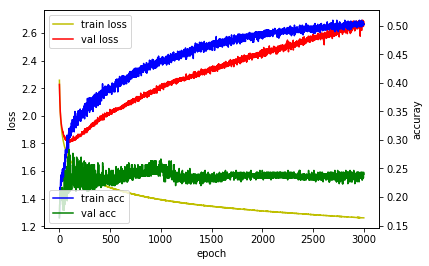

In [4]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

def showTrainProcess(hist):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
    acc_ax.plot(hist.history['acc'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')
    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')
    plt.show()
    
showTrainProcess(hist)

val_loss를 보면 에포크 횟수가 많아질 수록 감소하다가 150 에포크 근처에서 다시 증가됨을 알 수 있습니다. 이때 과적합이 발생한 것 입니다.

In [5]:
# 6. 모델 사용하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuray : ' + str(loss_and_metrics[1]))

 9248/10000 [==========================>...] - ETA: 0s
loss : 2.95229851189
accuray : 0.2601


## 조기 종료 시키기

* 학습 조기 종료를 위해서는 ‘EarlyStopping’이라는 함수를 사용하며 더 이상 개선의 여지가 없을 때 학습을 종료시키는 콜백함수입니다.
* 콜백함수라는 것 어떤 함수를 수행 시 그 함수에서 내가 지정한 함수를 호출하는 것을 말하며, 여기서는 fit 함수에서 EarlyStopping이라는 콜백함수가 학습 과정 중에 매번 호출됩니다. 
* 먼저 fit 함수에서 EarlyStopping 콜백함수를 지정하는 방법은 다음과 같습니다.

In [ ]:
early_stopping = EarlyStopping()
model.fit(X_train, Y_train, nb_epoch= 1000, callbacks=[early_stopping])

    에포크가 1000으로 지정했더라도 학습 과정에서 EarlyStopping 콜백함수를 
    호출하여 해당 조건이 되면 학습을 조기 종료시킵니다. 
    EarlyStopping 콜백함수에서 설정할 수 있는 인자는 다음과 같습니다.

In [ ]:
keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, \
                              patience=0, verbose=0, mode='auto')

* <font size=2>monitor : 관찰하고자 하는 항목입니다. ‘val_loss’나 ‘val_acc’가 주로 사용됩니다.</font><BR>
* <font size=2>min_delta : 개선되고 있다고 판단하기 위한 최소 변화량을 나타냅니다. 만약 변화량이 min_delta보다 적은 경우에는 개선이 없다고 판단합니다.</font>
* <font size=2>patience : 개선이 없다고 바로 종료하지 않고 개선이 없는 에포크를 얼마나 기다려 줄 것인 가를 지정합니다. 만약 10이라고 지정하면 개선이 없는 에포크가 10번째 지속될 경우 학습일 종료합니다.</font>
* <font size=2>verbose : 얼마나 자세하게 정보를 표시할 것인가를 지정합니다. (0, 1, 2)</font>
* <font size=2>mode : 관찰 항목에 대해 개선이 없다고 판단하기 위한 기준을 지정합니다. 예를 들어 관찰 항목이 ‘val_loss’인 경우에는 감소되는 것이 멈출 때 종료되어야 하므로, ‘min’으로 설정됩니다.</font>
* <font size=2>auto : 관찰하는 이름에 따라 자동으로 지정합니다.</font>
* <font size=2>min : 관찰하고 있는 항목이 감소되는 것을 멈출 때 종료합니다.</font>
* <font size=2>max : 관찰하고 있는 항목이 증가되는 것을 멈출 때 종료합니다.</font>

조기 종료 콜백함수를 적용한 코드는 다음과 같습니다.

In [22]:
# 4. 모델 학습시키기
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping() # 조기종료 콜백함수 정의
hist = model.fit(X_train, Y_train, epochs=3000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[early_stopping])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s - loss: 2.2858 - acc: 0.1471 - val_loss: 2.2306 - val_acc: 0.2133
Epoch 2/3000
700/700 [==============================] - 0s - loss: 2.2067 - acc: 0.2057 - val_loss: 2.1787 - val_acc: 0.2200
Epoch 3/3000
700/700 [==============================] - 0s - loss: 2.1607 - acc: 0.2329 - val_loss: 2.1454 - val_acc: 0.2300
Epoch 4/3000
700/700 [==============================] - 0s - loss: 2.1304 - acc: 0.2414 - val_loss: 2.1235 - val_acc: 0.2533
Epoch 5/3000
700/700 [==============================] - 0s - loss: 2.1069 - acc: 0.2671 - val_loss: 2.1048 - val_acc: 0.2700
Epoch 6/3000
700/700 [==============================] - 0s - loss: 2.0859 - acc: 0.2714 - val_loss: 2.0866 - val_acc: 0.2667
Epoch 7/3000
700/700 [==============================] - 0s - loss: 2.0644 - acc: 0.2829 - val_loss: 2.0708 - val_acc: 0.2733
Epoch 8/3000
700/700 [==============================] - 0s - loss: 2.0447 - acc

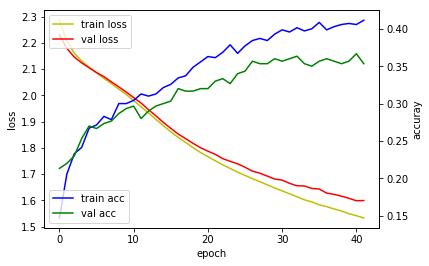

In [23]:
# 5. 모델 학습 과정 표시하기
showTrainProcess(hist)

In [24]:
# 6. 모델 사용하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuray : ' + str(loss_and_metrics[1]))

 9184/10000 [==========================>...] - ETA: 0s
loss : 1.65793762398
accuray : 0.3634


    val_loss 값이 감소되다가 증가되자마자 학습이 종료되었습니다. 
    하지만 이 모델은 좀 더 학습이 될 수 있는 모델임을 이미 알고 있습니다. 
    val_loss 특성 상 증가/감소를 반복하므로 val_loss가 증가되는 시점에 
    바로 종료하지말고 지속적으로 증가되는 시점에서 종료해보겠습니다. 
    이를 위해 EarlyStopping 콜백함수에서 patience 인자를 사용합니다.

In [25]:
early_stopping = EarlyStopping(patience = 20)

In [26]:
# 4. 모델 학습시키기
early_stopping = EarlyStopping(patience = 20) # 조기종료 콜백함수 정의
hist = model.fit(X_train, Y_train, epochs=3000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[early_stopping])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s - loss: 1.5276 - acc: 0.4114 - val_loss: 1.5863 - val_acc: 0.3600
Epoch 2/3000
700/700 [==============================] - 0s - loss: 1.5191 - acc: 0.4057 - val_loss: 1.5824 - val_acc: 0.3667
Epoch 3/3000
700/700 [==============================] - 0s - loss: 1.5093 - acc: 0.4057 - val_loss: 1.5869 - val_acc: 0.3600
Epoch 4/3000
700/700 [==============================] - 0s - loss: 1.5058 - acc: 0.4186 - val_loss: 1.5664 - val_acc: 0.3733
Epoch 5/3000
700/700 [==============================] - 0s - loss: 1.4987 - acc: 0.4186 - val_loss: 1.5615 - val_acc: 0.3733
Epoch 6/3000
700/700 [==============================] - 0s - loss: 1.4914 - acc: 0.4157 - val_loss: 1.5597 - val_acc: 0.3667
Epoch 7/3000
700/700 [==============================] - 0s - loss: 1.4855 - acc: 0.4186 - val_loss: 1.5562 - val_acc: 0.3600
Epoch 8/3000
700/700 [==============================] - 0s - loss: 1.4774 - acc

700/700 [==============================] - 0s - loss: 1.2447 - acc: 0.4986 - val_loss: 1.4100 - val_acc: 0.4133
Epoch 66/3000
700/700 [==============================] - 0s - loss: 1.2427 - acc: 0.5057 - val_loss: 1.4077 - val_acc: 0.4133
Epoch 67/3000
700/700 [==============================] - 0s - loss: 1.2382 - acc: 0.5014 - val_loss: 1.4057 - val_acc: 0.4367
Epoch 68/3000
700/700 [==============================] - 0s - loss: 1.2354 - acc: 0.5071 - val_loss: 1.4186 - val_acc: 0.4300
Epoch 69/3000
700/700 [==============================] - 0s - loss: 1.2331 - acc: 0.5029 - val_loss: 1.4199 - val_acc: 0.4300
Epoch 70/3000
700/700 [==============================] - 0s - loss: 1.2290 - acc: 0.5157 - val_loss: 1.3995 - val_acc: 0.4233
Epoch 71/3000
700/700 [==============================] - 0s - loss: 1.2288 - acc: 0.5086 - val_loss: 1.4027 - val_acc: 0.4300
Epoch 72/3000
700/700 [==============================] - 0s - loss: 1.2247 - acc: 0.5200 - val_loss: 1.4058 - val_acc: 0.4433
Epoch 

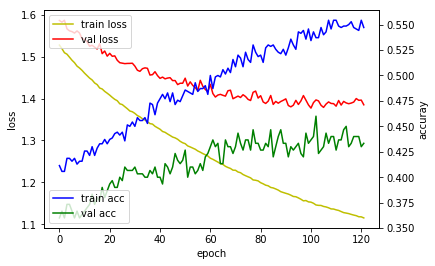

In [27]:
showTrainProcess(hist)

In [28]:
# 6. 모델 사용하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuray : ' + str(loss_and_metrics[1]))

 8384/10000 [========================>.....] - ETA: 0s
loss : 1.60096556511
accuray : 0.4062


    모델의 정확도도 향상됨을 확인할 수 있습니다.

### 요약
    본 절에서는 과적합되는 모델을 만들어보고, 조기종료 시키는 방법에 대해서 알아보았습니다. 
    케라스에서 제공하는 EarlyStopping 콜백함수를 조기종료에 사용해보았고, 설정인자를 살펴보았습니다.

![earlystoppting](./images/earlystopping.png)